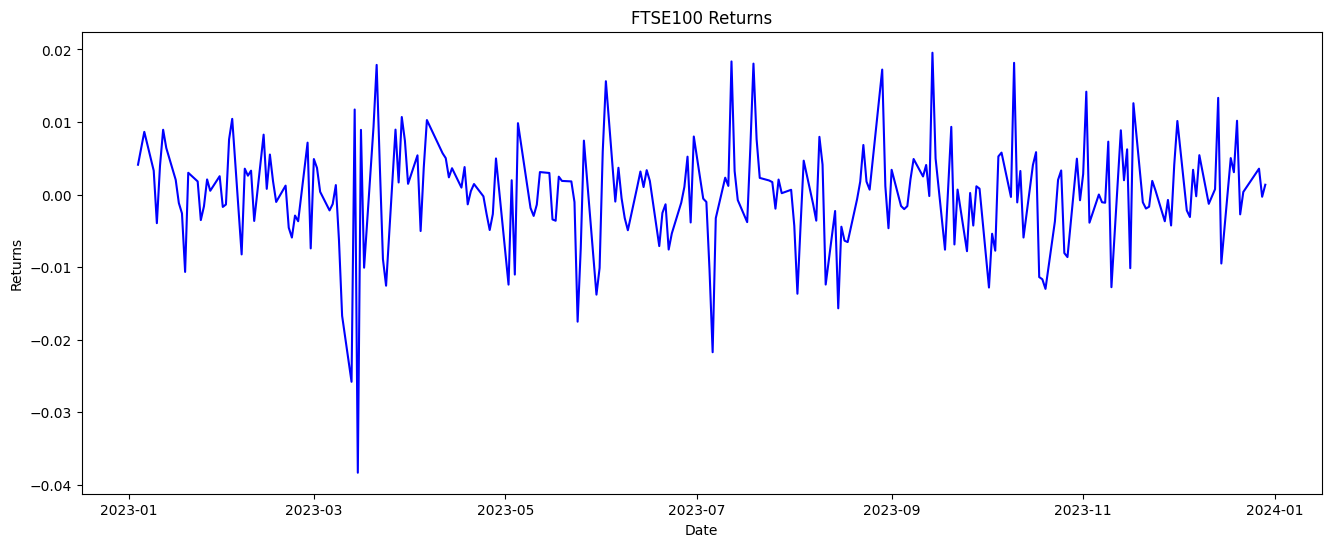

In [4]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Set the figure size to 16:6 format
fig1 = go.Figure(data=[go.Candlestick(x=ftse100.index,
                                     open=ftse100['Open'],
                                     high=ftse100['High'],
                                     low=ftse100['Low'],
                                     close=ftse100['Close'])])
fig1.update_layout(width=1600, height=600, title='FTSE100 Candlestick Chart')

fig2 = plt.figure(figsize=(16, 6))

# Plot the returns line chart
ax2 = fig2.add_subplot(111)
ax2.plot(ftse100.index, ftse100['Returns'], color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns')
ax2.set_title('FTSE100 Returns')

# Show the figures
fig1.show()
plt.show(fig2)



In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm, t, probplot


In [4]:

# Step 1: Download IBM monthly prices
symbol = "IBM"
data = yf.download(symbol, start="2000-01-01", end="2025-01-01", interval="1mo")
data['Simple_Return'] = data['Close'].pct_change()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))


[*********************100%***********************]  1 of 1 completed


In [10]:

# Step 2: Drop NaN values
returns = data[['Simple_Return', 'Log_Return']].dropna()

# Step 3: Fit Gaussian and Student's t distributions to log returns
log_returns = returns['Log_Return']
mu, sigma = norm.fit(log_returns)
t_params = t.fit(log_returns)

# Step 4: Create empirical and theoretical PDFs
x_log = np.linspace(log_returns.min(), log_returns.max(), 100)
pdf_normal_log = norm.pdf(x_log, mu, sigma)
pdf_student_log = t.pdf(x_log, *t_params)

# Step 3: Fit Gaussian and Student's t distributions to simple returns
simple_returns = returns['Simple_Return']
mu, sigma = norm.fit(simple_returns)
t_params = t.fit(simple_returns)

# Step 4: Create empirical and theoretical PDFs
x = np.linspace(simple_returns.min(), simple_returns.max(), 100)
pdf_normal_sim = norm.pdf(x, mu, sigma)
pdf_student_sim = t.pdf(x, *t_params)


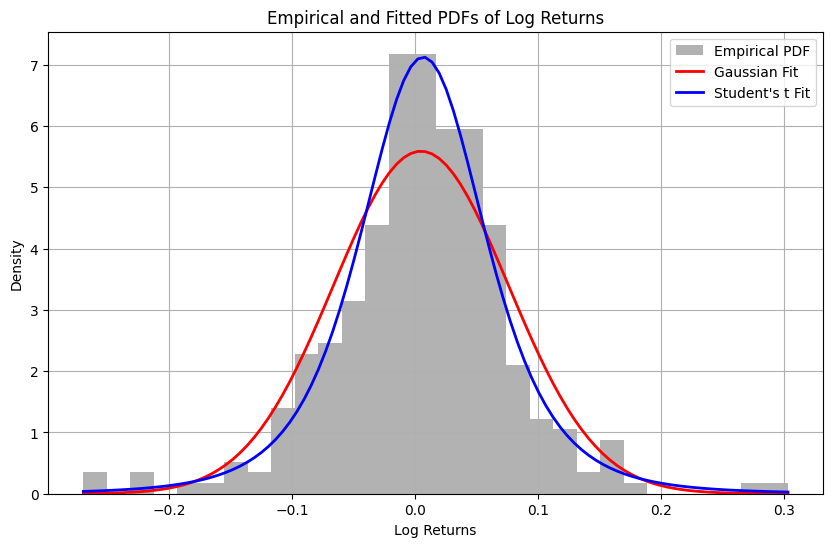

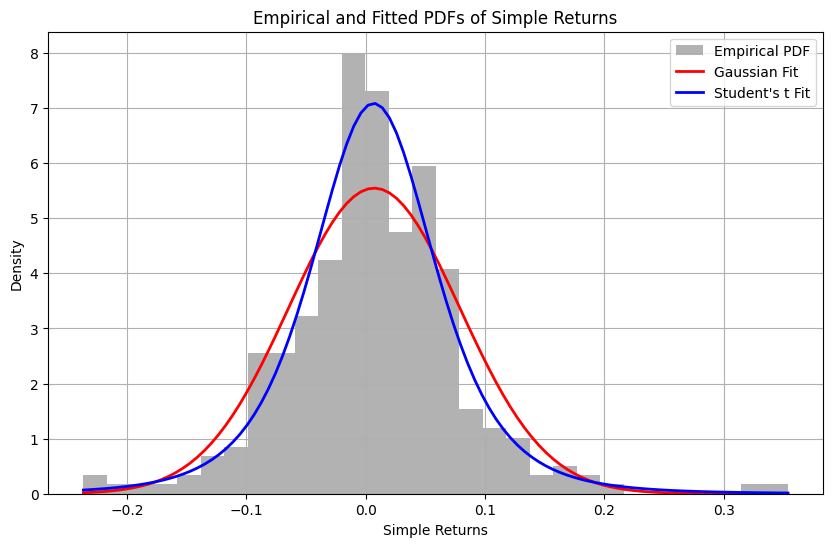

In [11]:

# Plot the empirical PDF and fitted PDFs
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=30, density=True, alpha=0.6, color='gray', label="Empirical PDF")
plt.plot(x_log, pdf_normal_log, 'r', lw=2, label="Gaussian Fit")
plt.plot(x_log, pdf_student_log, 'b', lw=2, label="Student's t Fit")
plt.title("Empirical and Fitted PDFs of Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Plot the empirical PDF and fitted PDFs of simple returns
plt.figure(figsize=(10, 6))
plt.hist(simple_returns, bins=30, density=True, alpha=0.6, color='gray', label="Empirical PDF")
plt.plot(x, pdf_normal_sim, 'r', lw=2, label="Gaussian Fit")
plt.plot(x, pdf_student_sim, 'b', lw=2, label="Student's t Fit")
plt.title("Empirical and Fitted PDFs of Simple Returns")
plt.xlabel("Simple Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


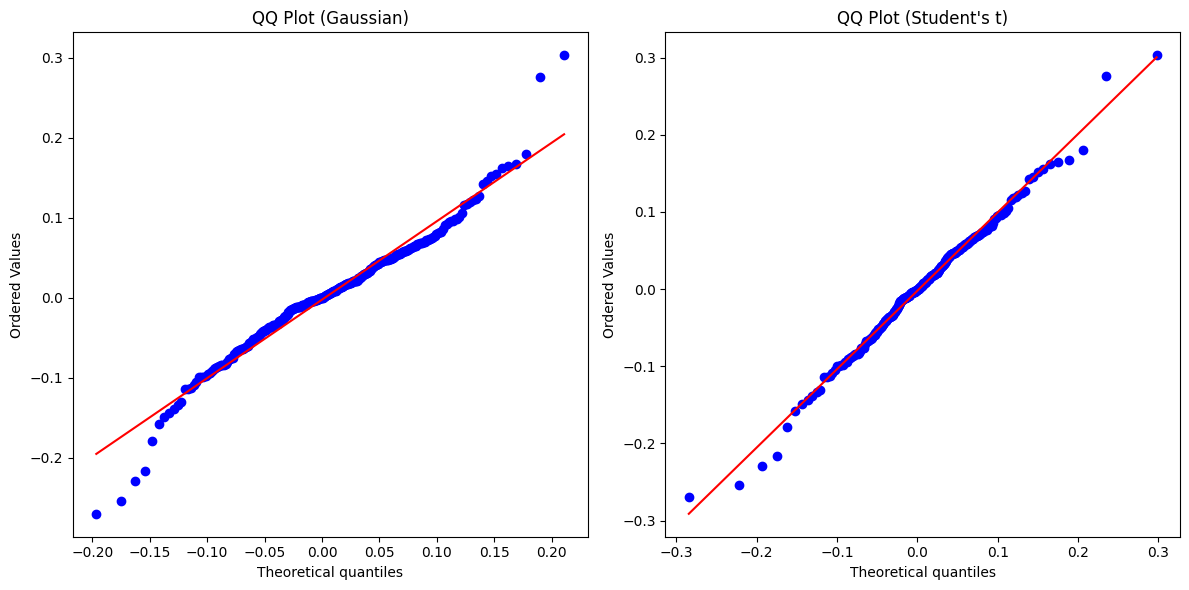

In [12]:

# Step 5: Generate QQ plots
plt.figure(figsize=(12, 6))

# QQ Plot for Gaussian
plt.subplot(1, 2, 1)
probplot(log_returns, dist="norm", sparams=(mu, sigma), plot=plt)
plt.title("QQ Plot (Gaussian)")

# QQ Plot for Student's t
plt.subplot(1, 2, 2)
probplot(log_returns, dist="t", sparams=t_params, plot=plt)
plt.title("QQ Plot (Student's t)")

plt.tight_layout()
plt.show()


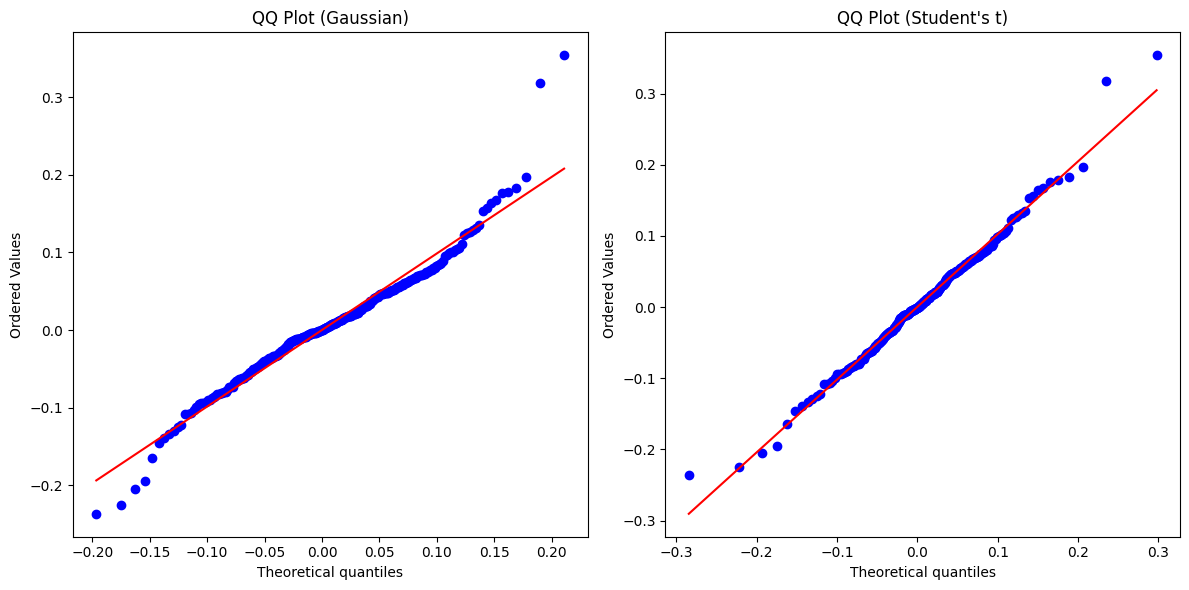

In [13]:

# Step 5: Generate QQ plots
plt.figure(figsize=(12, 6))

# QQ Plot for Gaussian
plt.subplot(1, 2, 1)
probplot(simple_returns, dist="norm", sparams=(mu, sigma), plot=plt)
plt.title("QQ Plot (Gaussian)")

# QQ Plot for Student's t
plt.subplot(1, 2, 2)
probplot(simple_returns, dist="t", sparams=t_params, plot=plt)
plt.title("QQ Plot (Student's t)")

plt.tight_layout()
plt.show()


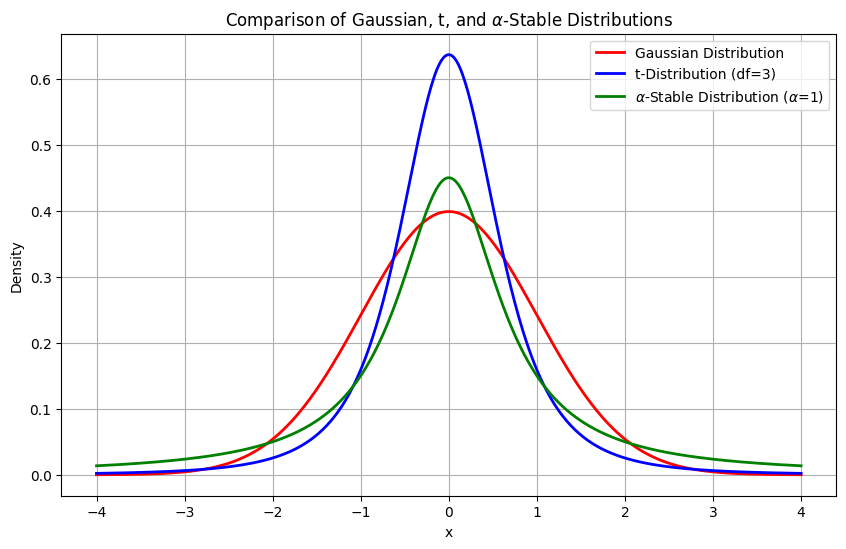

In [27]:
from scipy.stats import levy_stable
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Parameters for alpha-stable distribution
alpha = 1  # Stability parameter
beta = 0  # Symmetry parameter (0 for symmetric distribution)

# Parameters
mean = 0
variance = 1
df = 3  # Degrees of freedom for the t-distribution

# Standard deviation
std_dev = np.sqrt(variance)

# Range for x-axis
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 500)

# PDFs
pdf_normal = norm.pdf(x, mean, std_dev)
pdf_t = t.pdf(x, df, loc=mean, scale=std_dev / np.sqrt(df / (df - 2)))


# PDF for alpha-stable distribution
pdf_alpha_stable = levy_stable.pdf(x, alpha, beta, loc=mean, scale=std_dev/np.sqrt(2))
pdf_2_stable = levy_stable.pdf(x, 2, beta, loc=mean, scale=std_dev/np.sqrt(2))

# Plot with specified colors
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_normal, 'r', label="Gaussian Distribution", lw=2)  # Red for Gaussian
plt.plot(x, pdf_t, 'b', label=f"t-Distribution (df={df})", lw=2)  # Blue for t
plt.plot(x, pdf_alpha_stable, 'g', label=fr"$\alpha$-Stable Distribution ($\alpha$={alpha})", lw=2)  # Green for alpha-stable
plt.title(r"Comparison of Gaussian, t, and $\alpha$-Stable Distributions")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()
